In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    import citipy
except:
    import pip
    pip.main(['install','citipy'])
    import citipy
    
try:
    import gmaps
    import gmaps.datasets
except:
    import pip
    pip.main(['install','gmaps'])
    import gmaps
    import gmaps.datasets

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform( low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform( low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs) 

# this will unzip into a list

In [5]:
# use the print() to display the latitude and longitude combinations.

#for coordinate in coordinates:
    #print(coordinate[0], coordinate[1])

In [6]:
from citipy import citipy

In [7]:
# Create a list to hold the cities

cities = []

# Use for loop to identify nearest city for each lat and longatude combo

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we add it to cities list.
    
    if city not in cities:
        
        cities.append(city)
        
# Print the city count to confirm total (1500) 

len(cities)

602

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

# import requests module
import requests

#import API key
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=' + weather_api_key

In [10]:
# Create an empty list to hold the weather data

city_data = []

# Print the beginning of the logging

print("Beginning Data Retrieval        ")
print('--------------------------------')


# Create counters.

record_count = 1

set_count = 1

# Loop through all the cities in our list



#loop through all the cities in our list

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
        
        
    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    
    
    # Log the url, record, and set numbers and the city.
    
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # Add 1 to the record count.
    
    record_count += 1
    
# Run an API request for each of the cities.
    
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('$Y-$m-%d %H:%M:%S')
        
        # Append the city info into city_data list.
        
        city_data.append({'City': city.title(),
                        'Lat': city_lat,
                        'Lng': city_lng,
                        'Max Temp': city_max_temp,
                        'Humidity': city_humidity,
                        'Cloudiness': city_clouds,
                        'Wind Speed': city_wind,
                        'Country': city_country,
                        'Date': city_date})
# If an error is experienced, skip the city.
    except:
        
        print('City not found. Skipping...')
        
        pass

# Indicate that Data loading is complete

print('----------------------------------')
print('Date Retrival Complete            ')
print('----------------------------------')

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | nouadhibou
Processing Record 4 of Set 1 | kharp
Processing Record 5 of Set 1 | sioux lookout
Processing Record 6 of Set 1 | harwich
Processing Record 7 of Set 1 | chimbote
Processing Record 8 of Set 1 | broken hill
Processing Record 9 of Set 1 | grande-riviere
City not found. Skipping...
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | madimba
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | kurchum
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | anar darreh
City not found. Skipping...
Processing Record 21 of Se

Processing Record 37 of Set 4 | northam
Processing Record 38 of Set 4 | tabuk
Processing Record 39 of Set 4 | bilibino
Processing Record 40 of Set 4 | vilyuysk
Processing Record 41 of Set 4 | murgab
Processing Record 42 of Set 4 | jumla
Processing Record 43 of Set 4 | puerto madryn
Processing Record 44 of Set 4 | biak
Processing Record 45 of Set 4 | naze
Processing Record 46 of Set 4 | ciras
City not found. Skipping...
Processing Record 47 of Set 4 | samusu
City not found. Skipping...
Processing Record 48 of Set 4 | hunza
City not found. Skipping...
Processing Record 49 of Set 4 | fairbanks
Processing Record 50 of Set 4 | saint-philippe
Processing Record 1 of Set 5 | karratha
Processing Record 2 of Set 5 | rio grande
Processing Record 3 of Set 5 | champerico
Processing Record 4 of Set 5 | acapulco
Processing Record 5 of Set 5 | sampit
Processing Record 6 of Set 5 | sorong
Processing Record 7 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 5 | georgetown
P

Processing Record 27 of Set 8 | kaspiyskiy
Processing Record 28 of Set 8 | menongue
Processing Record 29 of Set 8 | margate
Processing Record 30 of Set 8 | yerbogachen
Processing Record 31 of Set 8 | awbari
Processing Record 32 of Set 8 | jucas
Processing Record 33 of Set 8 | sola
Processing Record 34 of Set 8 | puerto carreno
Processing Record 35 of Set 8 | torbay
Processing Record 36 of Set 8 | bacolod
Processing Record 37 of Set 8 | qaqortoq
Processing Record 38 of Set 8 | tutoia
Processing Record 39 of Set 8 | luziania
Processing Record 40 of Set 8 | havre-saint-pierre
Processing Record 41 of Set 8 | isla mujeres
Processing Record 42 of Set 8 | denpasar
Processing Record 43 of Set 8 | pedernales
Processing Record 44 of Set 8 | gorin
Processing Record 45 of Set 8 | half moon bay
Processing Record 46 of Set 8 | axim
Processing Record 47 of Set 8 | mazyr
Processing Record 48 of Set 8 | makakilo city
Processing Record 49 of Set 8 | jihlava
Processing Record 50 of Set 8 | drayton valley

Processing Record 18 of Set 12 | santa rosa
Processing Record 19 of Set 12 | tucuma
Processing Record 20 of Set 12 | sur
Processing Record 21 of Set 12 | mabaruma
Processing Record 22 of Set 12 | moengo
Processing Record 23 of Set 12 | bereda
Processing Record 24 of Set 12 | manta
Processing Record 25 of Set 12 | hurghada
Processing Record 26 of Set 12 | hamilton
Processing Record 27 of Set 12 | nazas
Processing Record 28 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 29 of Set 12 | kohtla-jarve
Processing Record 30 of Set 12 | la ciotat
Processing Record 31 of Set 12 | ituni
City not found. Skipping...
Processing Record 32 of Set 12 | hobyo
Processing Record 33 of Set 12 | fuente palmera
Processing Record 34 of Set 12 | copperas cove
Processing Record 35 of Set 12 | utiroa
City not found. Skipping...
Processing Record 36 of Set 12 | vila
Processing Record 37 of Set 12 | minbu
Processing Record 38 of Set 12 | udachnyy
Processing Record 39 of Set 12 | nizhneudinsk
Pr

In [11]:
len(city_data)

553

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,9.69,80,68,2.71,UY,$Y-$m-25 03:30:04
1,Nikolskoye,59.7035,30.7861,7.66,93,100,3.95,RU,$Y-$m-25 03:30:05
2,Nouadhibou,20.9310,-17.0347,23.99,100,40,3.09,MR,$Y-$m-25 03:30:05
3,Kharp,66.8014,65.8081,-0.07,74,78,1.45,RU,$Y-$m-25 03:30:06
4,Sioux Lookout,50.1001,-91.9170,10.04,100,100,0.00,CA,$Y-$m-25 03:30:06
5,Harwich,51.9419,1.2844,9.64,88,4,2.24,GB,$Y-$m-25 03:30:07
6,Chimbote,-9.0853,-78.5783,15.63,90,50,3.91,PE,$Y-$m-25 03:30:07
7,Broken Hill,-31.9500,141.4333,25.60,25,80,6.13,AU,$Y-$m-25 03:30:07
8,Albany,42.6001,-73.9662,11.92,84,33,1.69,US,$Y-$m-25 03:30:08
9,Avarua,-21.2078,-159.7750,24.03,69,20,10.29,CK,$Y-$m-25 03:30:08


In [15]:
# Create the output file (CSV)

output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label='City_ID')

In [16]:
# Create variable for relevant fields to be used in plots

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df["Cloudiness"]
wind_speed =city_data_df['Wind Speed']

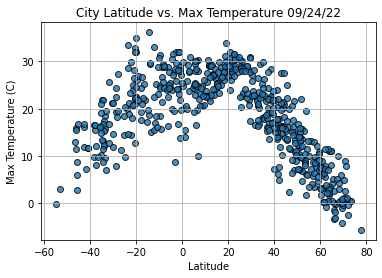

In [17]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temps,
           edgecolor='black', 
           linewidths=1,
           marker='o',
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.

plt.title(f'City Latitude vs. Max Temperature ' + time.strftime("%x"))
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig1.png')

# Show plot.

plt.show()

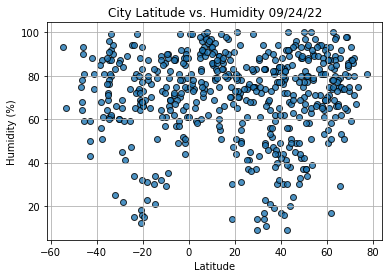

In [18]:
# Build the scatter plot for latitude vs. humidity.

plt.scatter(lats,
           humidity,
           edgecolor='black', 
           linewidths=1,
           marker='o',
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.

plt.title(f'City Latitude vs. Humidity ' + time.strftime("%x"))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig2.png')

# Show plot.

plt.show()

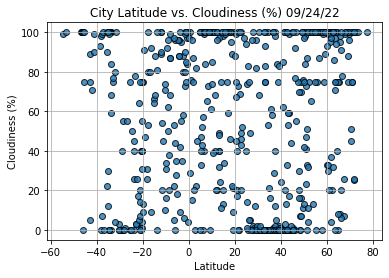

In [19]:
# Build the scatter plot for latitude vs. Cloudiness.

plt.scatter(lats,
           cloudiness,
           edgecolor='black', 
           linewidths=1,
           marker='o',
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.

plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig3.png')

# Show plot.

plt.show()

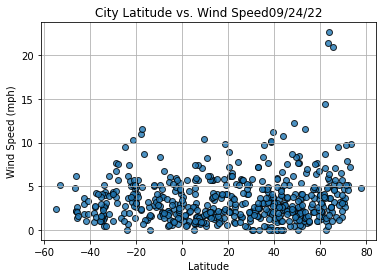

In [20]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           wind_speed,
           edgecolor='black', 
           linewidths=1,
           marker='o',
           alpha=0.8,
           label="Cities")

# Incorporate the other graph properties.

plt.title(f'City Latitude vs. Wind Speed' + time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure

plt.savefig('weather_data/Fig4.png')

# Show plot.

plt.show()

In [21]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data

# and plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line 'y values' from the slope and intercept
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)) + '    r-value = ' + str(round(r_value,2))
    
    # Create a scatter plot and plot the regression line
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    # Annotate the text for the line equation
    
    plt.annotate(line_eq, text_coordinates, fontsize=10, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere df

northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

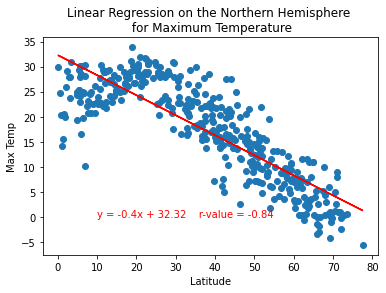

In [23]:
# Linear regressions on the northern hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                      'Max Temp', (10,0))


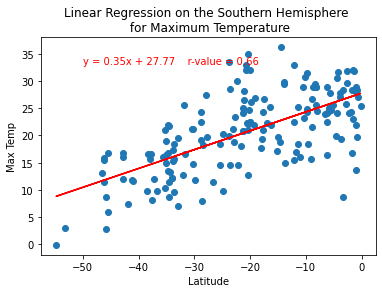

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,33))

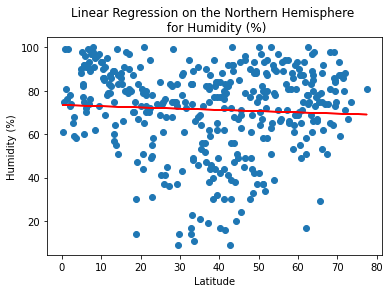

In [25]:
# Linear regressions on the northern hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Humidity (%)', 
                      'Humidity (%)', (10,0))

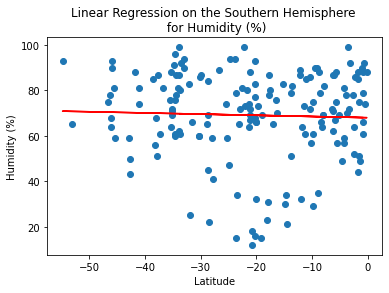

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Humidity (%)', 
                       'Humidity (%)',(-50,5))

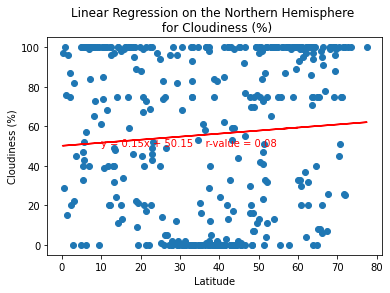

In [27]:
# Linear regressions on the northern hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Cloudiness (%)', 
                      'Cloudiness (%)', (10,50))

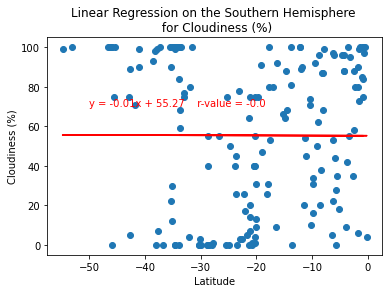

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness (%)', 
                       'Cloudiness (%)',(-50,70))


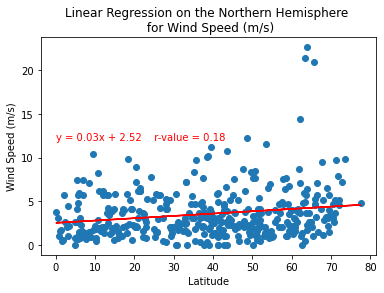

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed (m/s)', 
                       'Wind Speed (m/s)',(0,12))

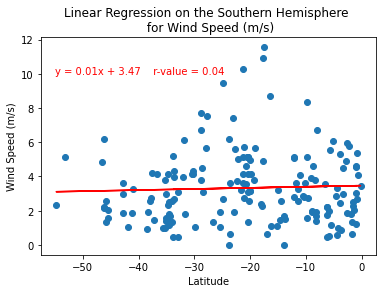

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed (m/s)', 
                       'Wind Speed (m/s)',(-55,10))